<a href="https://www.kaggle.com/code/franciscangeno/wine-clustering?scriptVersionId=113250661" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import clear_output
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv


In [2]:
df=pd.read_csv("/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv")

In [3]:
df.shape

(178, 13)

In [4]:
df.head(8)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295


In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**From the dataset:**
1. There are no null values
2. Data is of the correct data types
3. There are no categorical values
**This is a basic dataset**

In [8]:
# get the names of all the columns
features = df.columns.to_list()
print(features)

['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']


In [9]:
# make a new copy of the data
data = df.copy()

# **STEPS TO DO K_MEANS CLUSTERING**
1. **Scale the Data:** we need to scale the data so that it goes a certain value to a certain value. If we look at the columns, some of them have very high values and the others have a very small value and at the end the algorithm will treat columns with high values with much importance and that's not what we want.
2. **Initialize random centroids**
3. **Label each datapoint:** based on how far the data point is from each centroid . This will give us cluster assignments for each wine.
4. **Update our centroids**
5. **Repeat steps 3 and 4 till convergence**

In [10]:
# scale the data using min max scaling 
data = (data-data.min())/(data.max()-data.min())*9+1

In [11]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,5.667253,3.839355,5.844199,5.126520,3.909502,5.081383,4.207474,4.937142,4.352710,3.901264,4.493532,5.423139,4.010014
std,1.922747,1.987019,1.320372,1.549282,1.397199,1.942296,1.896567,2.113359,1.624994,1.780254,1.672475,2.340628,2.021517
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.155921,2.534091,5.090909,4.061856,2.760870,3.366379,2.642405,3.377358,3.384858,2.489761,3.213415,3.200549,2.428317
50%,5.784211,3.000988,5.812834,5.128866,3.739130,5.267241,4.408228,4.566038,4.250789,3.618601,4.548780,5.978022,3.538873
75%,7.270395,5.166502,6.763369,6.056701,4.619565,6.648276,5.813291,6.221698,5.372240,4.778157,5.682927,7.263736,5.538516
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [12]:
data.head(6)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,8.578947,2.725296,6.149733,3.319588,6.576087,6.648276,6.164557,3.547170,6.337539,4.348123,5.097561,9.736264,6.052068
1,6.139474,2.849802,4.754011,1.278351,3.934783,6.182759,5.594937,3.207547,3.470032,3.380546,5.170732,8.021978,5.955777
2,6.044737,3.881423,7.304813,4.711340,4.032609,6.648276,6.506329,3.886792,7.813880,4.378840,5.024390,7.263736,6.822397
3,8.910526,3.152174,6.486631,3.876289,5.206522,9.906897,6.981013,2.867925,6.025237,6.006826,3.780488,8.186813,8.716120
4,6.234211,4.290514,8.267380,5.824742,5.695652,6.648276,5.462025,5.415094,5.003155,3.334471,5.097561,6.472527,3.933666
5,8.507895,2.814229,6.245989,3.134021,5.108696,8.106897,6.791139,4.566038,5.429022,5.200512,5.170732,6.208791,8.523538


In [13]:
# initialize random centroids 
def random_centroids(data,k):
    centroids = []
    for i in range(k):
        # create a value for each feature and we need the values to be random from the dataset
        centroid = data.apply(lambda x: float(x.sample()))
        # get random value from each column
        centroids.append(centroid)
    return pd.concat(centroids,axis = 1)

In [14]:
centroids = random_centroids(data,5)

In [15]:
centroids

,0,1,2,3,4
Alcohol,5.381579,2.918421,4.292105,6.044737,7.347368
Malic_Acid,5.197628,4.290514,1.764822,5.446640,2.760870
Ash,6.679144,6.149733,3.502674,5.957219,5.379679
Ash_Alcanity,6.056701,2.577320,5.824742,5.128866,7.216495
Magnesium,2.467391,4.913043,4.717391,2.858696,4.913043
Total_Phenols,7.579310,7.579310,5.282759,3.079310,2.737931
Flavanoids,3.411392,4.322785,3.848101,1.493671,1.417722
Nonflavanoid_Phenols,5.584906,3.716981,9.490566,8.641509,9.490566
Proanthocyanins,4.520505,2.504732,6.309148,5.003155,4.264984
Color_Intensity,2.451365,7.895904,2.029010,5.200512,3.034983


In [16]:
def get_labels(data, centroids):
    # label each datapoint according to the clusters
    distances = centroids.apply(lambda x: np.sqrt(((data-x) ** 2).sum(axis=1)))
    # find which cluster wines are in
    return distances.idxmin(axis=1)

In [17]:
labels = get_labels(data,centroids)

In [18]:
# how many wines are in each cluster
labels.value_counts()

3    57
0    51
1    26
4    22
2    22
dtype: int64

In [19]:
def new_centroids(data,labels,k):
    # update the centroids based on what is in the cluster
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [20]:
def plot_clusters(data,labels,centroids,iteration):
    pca = PCA(n_components=2)
    new_data = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f"Iteration {iteration}")
    # plot each datapoint into the graph
    plt.scatter(x=new_data[:,0],y=new_data[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()
    

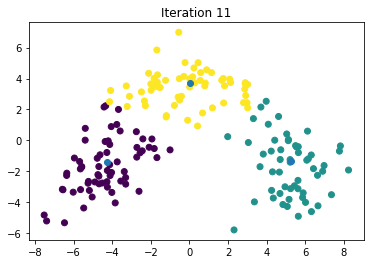

In [21]:
# kmeans
max_iterations = 100
k=3
centroids = random_centroids(data,k)
old_centroids = pd.DataFrame()
iteration = 1
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data,labels,k)
    plot_clusters(data,labels,centroids,iteration)
    iteration += 1


In [22]:
# interpret the output
centroids

,0,1,2
Alcohol,7.178090,5.770797,3.513294
Malic_Acid,3.001530,4.822462,2.798668
Ash,6.078539,5.969271,5.008612
Ash_Alcanity,3.906392,5.730401,5.290155
Magnesium,4.404798,3.651801,3.051941
Total_Phenols,6.744869,3.008879,4.711086
Flavanoids,5.970258,1.872124,4.168829
Nonflavanoid_Phenols,3.482156,6.141200,4.353526
Proanthocyanins,5.177694,2.832381,4.266125
Color_Intensity,4.042035,4.994368,2.192438


In [23]:
df [labels == 1]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.270000,1.250,1.67,680
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.750000,0.980,1.59,450
68,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.170000,1.020,1.93,750
70,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.050000,0.906,1.82,870
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.800000,0.840,2.01,515
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.050000,0.960,2.06,495
118,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.400000,0.700,2.12,372
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.760,1.29,630
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.740,1.42,530
132,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.700000,0.660,1.36,560


In [24]:
# compare with scikit learn 
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [25]:
centroids=kmeans.cluster_centers_

In [26]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
Alcohol,3.820301,7.350863,5.920175
Malic_Acid,3.120553,3.235858,5.359684
Ash,5.257448,6.264136,6.054367
Ash_Alcanity,5.502209,4.099882,5.847938
Magnesium,3.209627,4.696543,3.836957
Total_Phenols,5.032512,6.779028,3.220690
Flavanoids,4.420735,5.992115,1.942686
Nonflavanoid_Phenols,4.768194,3.703062,6.528302
Proanthocyanins,4.574583,5.295444,3.028917
Color_Intensity,2.330083,4.198064,5.399033
